# Vehicle Insurance Claim Fraud Detection (EDA)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [2]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
vic.shape

(15420, 33)

In [4]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 8 numerical features

In [5]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

#### Numerical Data

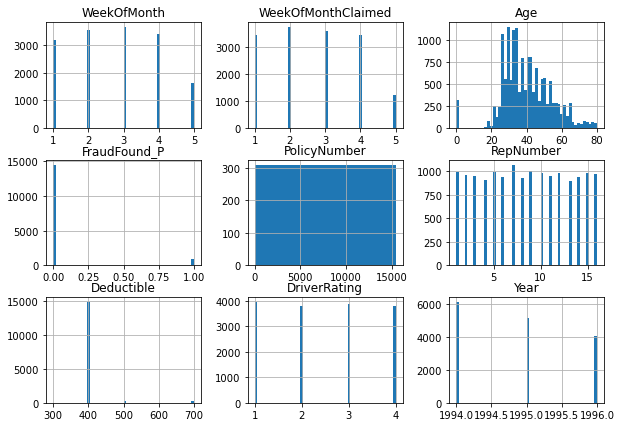

In [10]:
vic.hist(bins=50, figsize=(10, 7))
plt.show()

#### FraudFound_P (Target)

In [9]:
vic['FraudFound_P']

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15420, dtype: int64

In [10]:
vic['FraudFound_P'].describe()

count    15420.000000
mean         0.059857
std          0.237230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: FraudFound_P, dtype: float64

In [11]:
vic['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [12]:
print('Percentage of 0 (No Fraud Claim) is', round(vic['FraudFound_P'].value_counts()[0] / vic.shape[0] * 100, 5))
print('Percentage of 1 (Fraud Claim) is', round(vic['FraudFound_P'].value_counts()[1] / vic.shape[0] * 100, 5))

Percentage of 0 (No Fraud Claim) is 94.01427
Percentage of 1 (Fraud Claim) is 5.98573


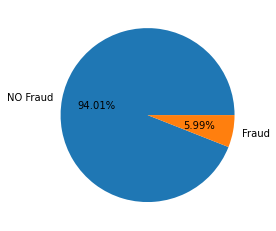

In [13]:
labels = ['NO Fraud','Fraud']
plt.pie(vic['FraudFound_P'].value_counts().values, labels=labels, autopct='%1.2f%%')
plt.show()

### Conclusion for FraudFound_P (Target) Analysis
From the pie plot, we understand that this dataset is imbalanced, that means we don't have enough samples from each class and we will have problems to train the model, so we have to balance this dataset before training the model. We do this in the data preprocessing section

#### Month Analysis

In [18]:
vic['Month']

0        Dec
1        Jan
2        Oct
3        Jun
4        Jan
        ... 
15415    Nov
15416    Nov
15417    Nov
15418    Dec
15419    Dec
Name: Month, Length: 15420, dtype: object

In [19]:
vic.Month.describe()

count     15420
unique       12
top         Jan
freq       1411
Name: Month, dtype: object

In [20]:
month = pd.DataFrame(vic.groupby(['Month']).size()).reset_index()
month = month.rename(columns={0: 'NumberOfAccidents'})
month

,Month,NumberOfAccidents
0,Apr,1280
1,Aug,1127
2,Dec,1285
3,Feb,1266
4,Jan,1411
5,Jul,1257
6,Jun,1321
7,Mar,1360
8,May,1367
9,Nov,1201


In [21]:
sorted_month = month.sort_values(by=['NumberOfAccidents'], ascending=False)
sorted_month

,Month,NumberOfAccidents
4,Jan,1411
8,May,1367
7,Mar,1360
6,Jun,1321
10,Oct,1305
2,Dec,1285
0,Apr,1280
3,Feb,1266
5,Jul,1257
11,Sep,1240


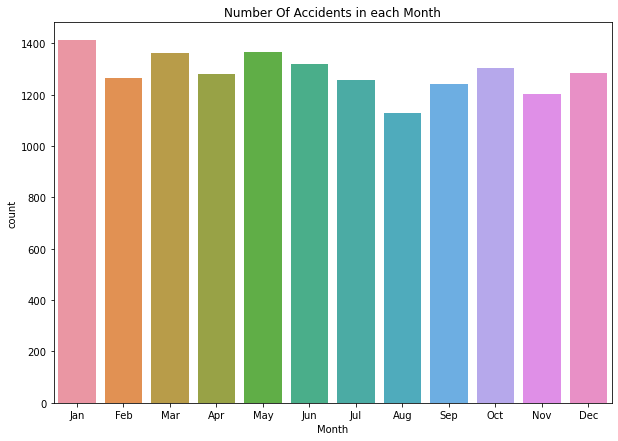

In [120]:
plt.figure(figsize=(10, 7))
sns.countplot(x=vic['Month'], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number Of Accidents in each Month')
plt.show()

In [23]:
month_fraud = vic[['Month', 'FraudFound_P']]
month_fraud

,Month,FraudFound_P
0,Dec,0
1,Jan,0
2,Oct,0
3,Jun,0
4,Jan,0
...,...,...
15415,Nov,1
15416,Nov,0
15417,Nov,1
15418,Dec,0


In [24]:
month_fraud = month_fraud.groupby(['Month', 'FraudFound_P']).size().reset_index().rename(columns={0: 'NumberOfAccidents'})
month_fraud

,Month,FraudFound_P,NumberOfAccidents
0,Apr,0,1200
1,Apr,1,80
2,Aug,0,1043
3,Aug,1,84
4,Dec,0,1223
5,Dec,1,62
6,Feb,0,1184
7,Feb,1,82
8,Jan,0,1324
9,Jan,1,87


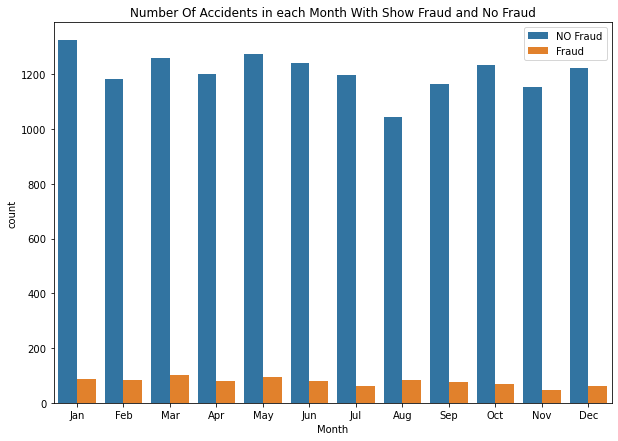

In [27]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['Month'], hue=vic['FraudFound_P'], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Month With Show Fraud and No Fraud')
plt.show()

### Conclusion for Month Analysis
The amount of claims in different months does not differ so much that we can find out a special point from it.
1. January: 1411 number of claims (Highest)
2. August: 1127 number of claims (Lowest)

#### Week Of Month Analysis

In [28]:
vic['WeekOfMonth']

0        5
1        3
2        5
3        2
4        5
        ..
15415    4
15416    5
15417    5
15418    1
15419    2
Name: WeekOfMonth, Length: 15420, dtype: int64

In [29]:
vic['WeekOfMonth'].describe().T

count    15420.000000
mean         2.788586
std          1.287585
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: WeekOfMonth, dtype: float64

In [30]:
week = pd.DataFrame(vic.groupby(['WeekOfMonth']).size()).reset_index()
week = week.rename(columns={0: 'NumberOfAccidents'})
week

,WeekOfMonth,NumberOfAccidents
0,1,3187
1,2,3558
2,3,3640
3,4,3398
4,5,1637


In [31]:
sorted_week = week.sort_values(by=['NumberOfAccidents'], ascending=False)
sorted_week

,WeekOfMonth,NumberOfAccidents
2,3,3640
1,2,3558
3,4,3398
0,1,3187
4,5,1637


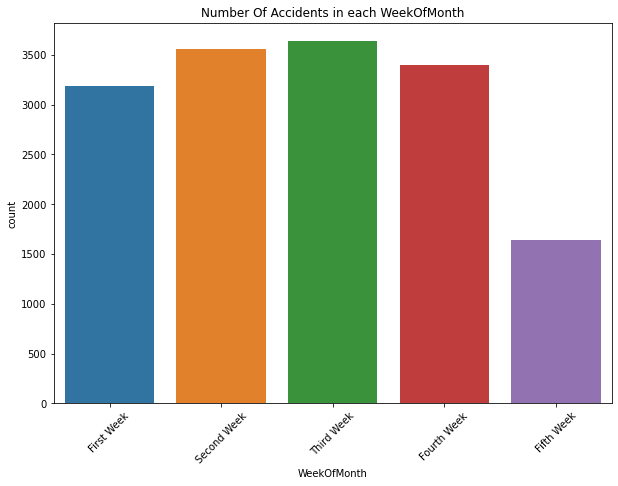

In [32]:
plt.figure(figsize=(10, 7))
sns.countplot(x=vic['WeekOfMonth'])
plt.title('Number Of Accidents in each WeekOfMonth')
plt.xticks(np.arange(0, 5), ['First Week', 'Second Week', 'Third Week', 'Fourth Week', 'Fifth Week'], rotation=45)
plt.show()

In [33]:
week_fraud = vic[['WeekOfMonth', 'FraudFound_P']]
week_fraud

,WeekOfMonth,FraudFound_P
0,5,0
1,3,0
2,5,0
3,2,0
4,5,0
...,...,...
15415,4,1
15416,5,0
15417,5,1
15418,1,0


In [34]:
week_fraud = week_fraud.groupby(['WeekOfMonth', 'FraudFound_P']).size().reset_index().rename(columns={0: 'NumberOfAccidents'})
week_fraud

,WeekOfMonth,FraudFound_P,NumberOfAccidents
0,1,0,2987
1,1,1,200
2,2,0,3333
3,2,1,225
4,3,0,3425
5,3,1,215
6,4,0,3206
7,4,1,192
8,5,0,1546
9,5,1,91


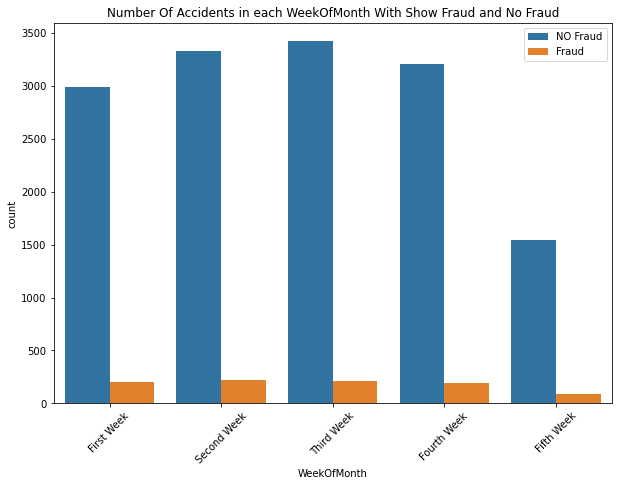

In [35]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['WeekOfMonth'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each WeekOfMonth With Show Fraud and No Fraud')
plt.xticks(np.arange(0, 5), ['First Week', 'Second Week', 'Third Week', 'Fourth Week', 'Fifth Week'], rotation=45)
plt.show()

In [36]:
Month = ['January', 'February', 'March', 'April', 'May', 
'June', 'July', 'August', 'September', 'October', 'November', 'December']

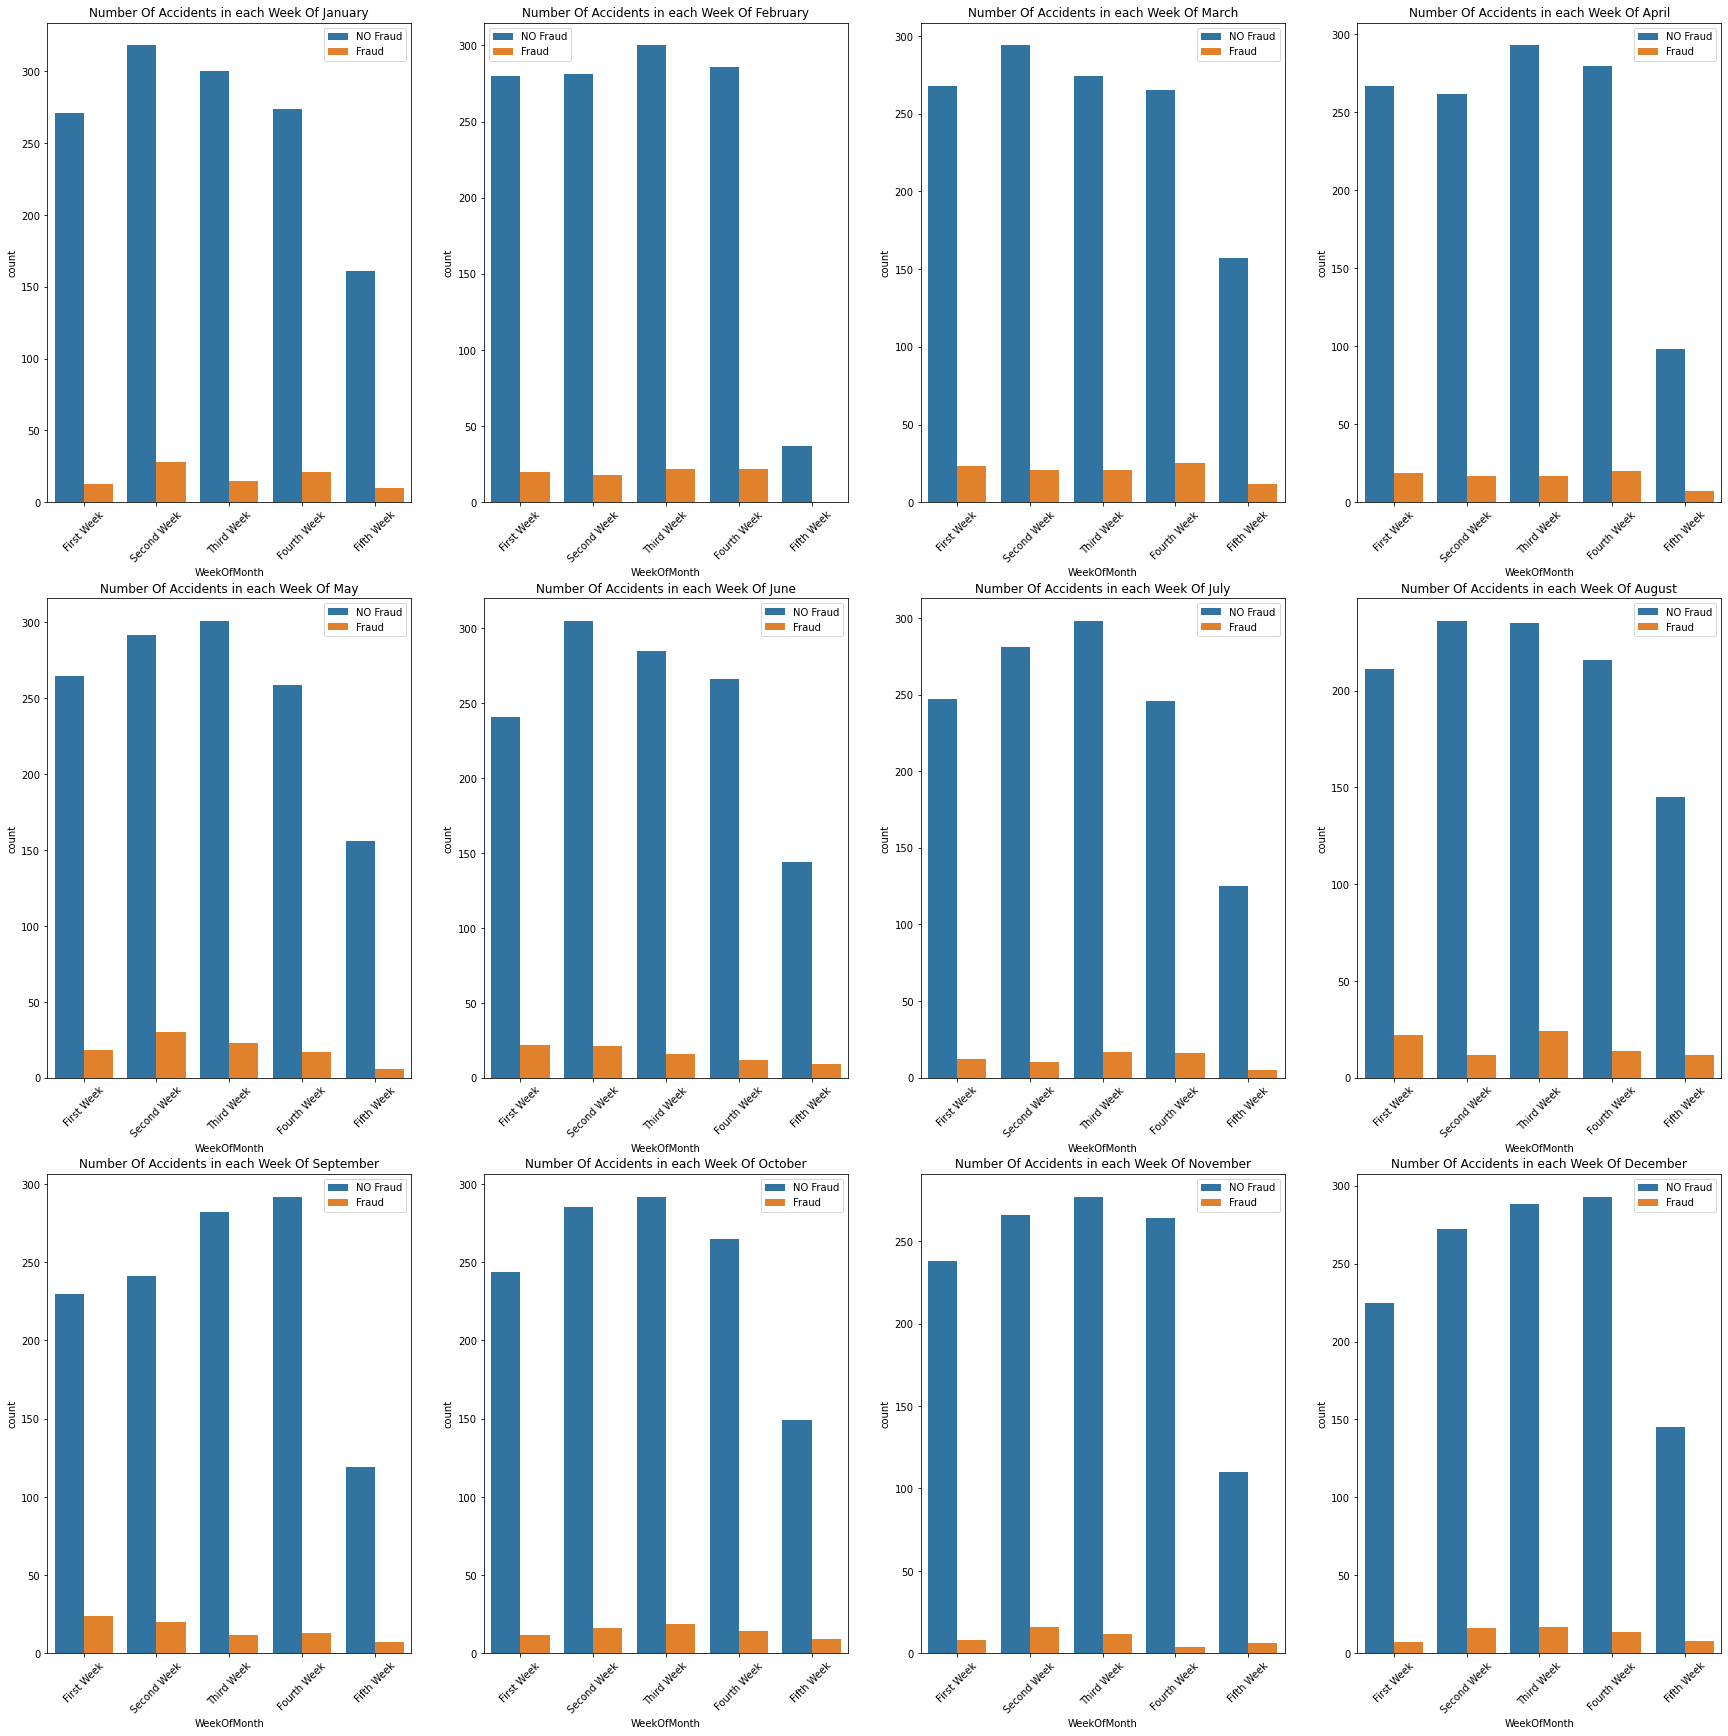

In [37]:
def show_countplot(name, data):
    labels = ['NO Fraud','Fraud']
    sns.countplot(x=data, hue=vic['FraudFound_P'])
    plt.legend(labels, loc='best')
    plt.title(f'Number Of Accidents in each Week Of {name}')
    plt.xticks(np.arange(0, 5), ['First Week', 'Second Week', 'Third Week', 'Fourth Week', 'Fifth Week'], rotation=45)

plt.figure(figsize=(30, 30))
for i in range(12):
    plt.subplot(3, 4, i + 1), show_countplot(Month[i], vic[vic['Month'] == Month[i][:3]]['WeekOfMonth'])
plt.show()

### Conclusion for Week Of Month Analysis
It is noteworthy that in all months, most of the claims were in the middle weeks of the months. As we can see, in all months, the most claims were in the second, third or fourth week.<br>
Also, on average and regardless of different months, the most claims belong to the following weeks respectively:
1. Third Week (Highest)
2. Second Week 
3. Fourth Week
4. First Week
5. Fifth Week (Lowest)

#### Day Of Week Analysis

In [38]:
vic['DayOfWeek']

0        Wednesday
1        Wednesday
2           Friday
3         Saturday
4           Monday
           ...    
15415       Friday
15416     Thursday
15417     Thursday
15418       Monday
15419    Wednesday
Name: DayOfWeek, Length: 15420, dtype: object

In [39]:
vic['DayOfWeek'].describe()

count      15420
unique         7
top       Monday
freq        2616
Name: DayOfWeek, dtype: object

In [40]:
day = pd.DataFrame(vic.groupby(['DayOfWeek']).size()).reset_index()
day = day.rename(columns={0: 'NumberOfAccidents'})
day

,DayOfWeek,NumberOfAccidents
0,Friday,2445
1,Monday,2616
2,Saturday,1982
3,Sunday,1745
4,Thursday,2173
5,Tuesday,2300
6,Wednesday,2159


In [41]:
sorted_day = day.sort_values(by=['NumberOfAccidents'], ascending=False)
sorted_day

,DayOfWeek,NumberOfAccidents
1,Monday,2616
0,Friday,2445
5,Tuesday,2300
4,Thursday,2173
6,Wednesday,2159
2,Saturday,1982
3,Sunday,1745


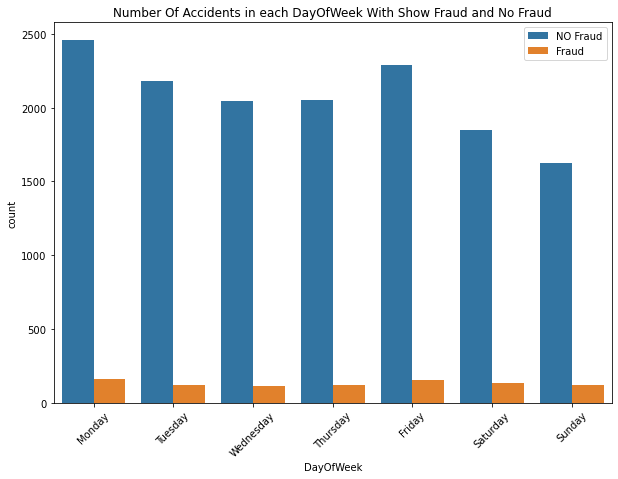

In [42]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['DayOfWeek'], hue=vic['FraudFound_P'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each DayOfWeek With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

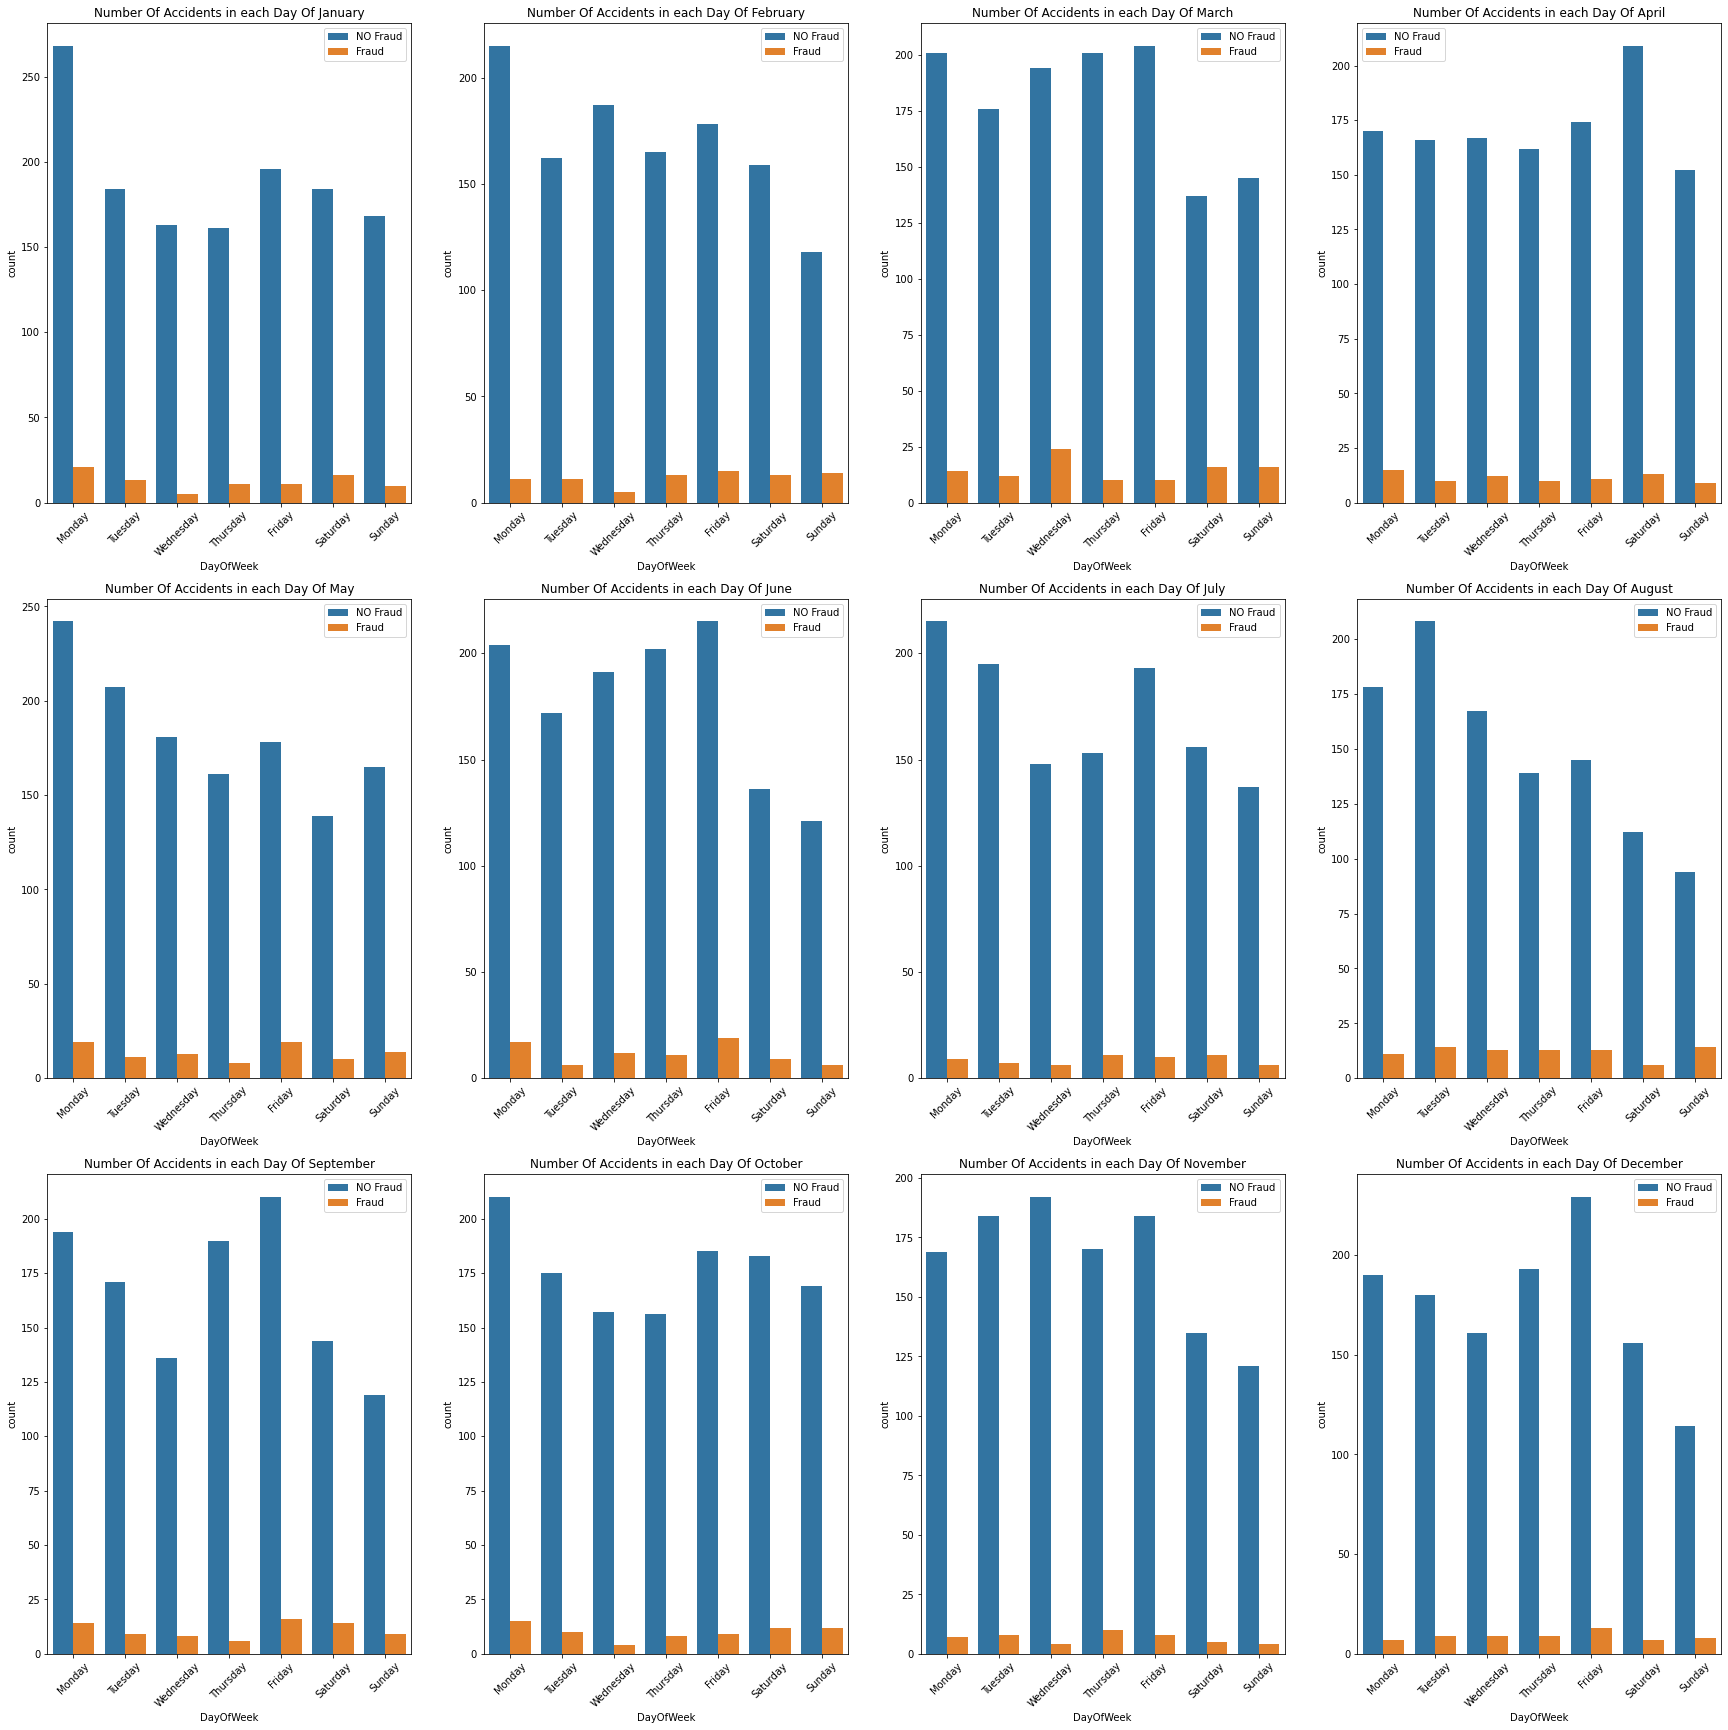

In [43]:
def show_countplot(name, data):
    labels = ['NO Fraud','Fraud']
    sns.countplot(x=data, hue=vic['FraudFound_P'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.legend(labels, loc='best')
    plt.title(f'Number Of Accidents in each Day Of {name}')
    plt.xticks(rotation=45)

plt.figure(figsize=(30, 30))
for i in range(12):
    plt.subplot(3, 4, i + 1), show_countplot(Month[i], vic[vic['Month'] == Month[i][:3]]['DayOfWeek'])
plt.show()

### Conclusion for Day Of Week Analysis
As you can see, most of the claims are on Monday, Tuesday, Thursday and Friday, that is, on the first day of the week and the last working day of the week.
In order, the most claims belong to the following days:
1. Monday (Highest)
2. Friday
3. Tuesday
4. Thursday
5. Wednesday
6. Saturday
7. Sunday (Lowest)

#### Make Analysis

In [44]:
vic['Make']

0          Honda
1          Honda
2          Honda
3         Toyota
4          Honda
          ...   
15415     Toyota
15416    Pontiac
15417     Toyota
15418     Toyota
15419     Toyota
Name: Make, Length: 15420, dtype: object

In [45]:
vic['Make'].describe()

count       15420
unique         19
top       Pontiac
freq         3837
Name: Make, dtype: object

In [46]:
make = pd.DataFrame(vic.groupby(['Make']).size()).reset_index()
make = make.rename(columns={0: 'NumberOfAccidents'})
make

,Make,NumberOfAccidents
0,Accura,472
1,BMW,15
2,Chevrolet,1681
3,Dodge,109
4,Ferrari,2
5,Ford,450
6,Honda,2801
7,Jaguar,6
8,Lexus,1
9,Mazda,2354


In [47]:
sorted_make = make.sort_values(by=['NumberOfAccidents'], ascending=False)
sorted_make

,Make,NumberOfAccidents
13,Pontiac,3837
17,Toyota,3121
6,Honda,2801
9,Mazda,2354
2,Chevrolet,1681
0,Accura,472
5,Ford,450
18,VW,283
3,Dodge,109
15,Saab,108


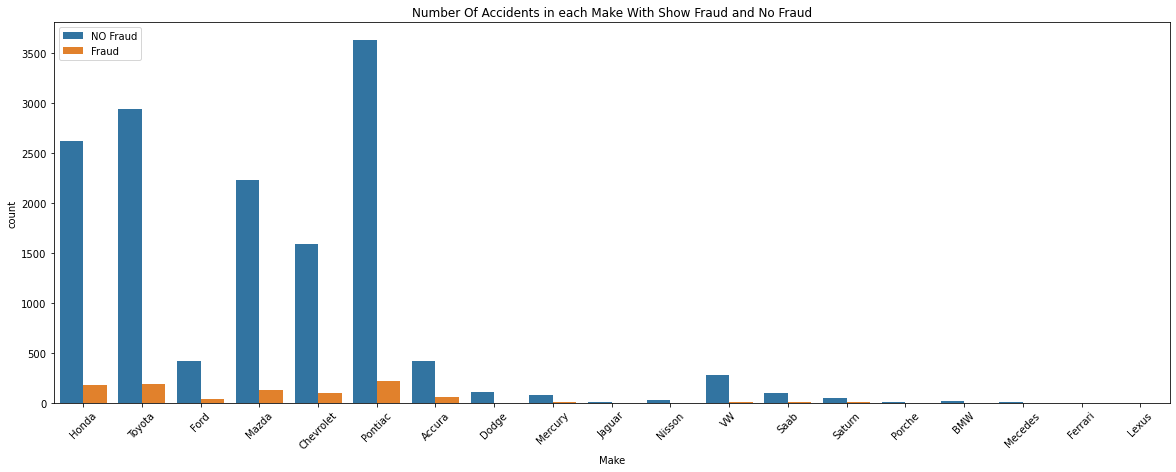

In [48]:
plt.figure(figsize=(20, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['Make'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Make With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

### Conclusion for Make Analysis
Top 5 of claims in order is:
1. Pontiac (Highest)
2. Toyota
3. Honda
4. Mazda
5. Chevrolet

and "Lexus" has the Lowest number of claims.

#### Accident Area Analysis

In [49]:
vic['AccidentArea']

0        Urban
1        Urban
2        Urban
3        Rural
4        Urban
         ...  
15415    Urban
15416    Urban
15417    Rural
15418    Urban
15419    Urban
Name: AccidentArea, Length: 15420, dtype: object

In [50]:
vic['AccidentArea'].describe()

count     15420
unique        2
top       Urban
freq      13822
Name: AccidentArea, dtype: object

In [51]:
area = pd.DataFrame(vic.groupby(['AccidentArea']).size()).reset_index()
area = area.rename(columns={0: 'NumberOfAccidents'})
area

,AccidentArea,NumberOfAccidents
0,Rural,1598
1,Urban,13822


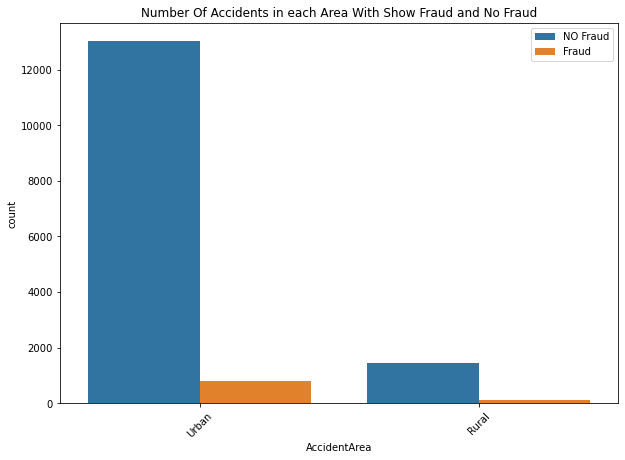

In [52]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['AccidentArea'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Area With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

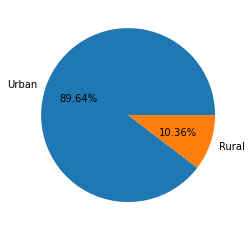

In [53]:
labels = ['Urban', 'Rural']
plt.pie(vic['AccidentArea'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

### Conclusion for Accident Area Analysis
Most accidents occur in Urban areas (approximately 89.64%) and the remaining 10.36% occur in Rural areas.

#### Sex Analysis

In [54]:
vic['Sex']

0        Female
1          Male
2          Male
3          Male
4        Female
          ...  
15415      Male
15416      Male
15417      Male
15418    Female
15419      Male
Name: Sex, Length: 15420, dtype: object

In [55]:
vic['Sex'].describe()

count     15420
unique        2
top        Male
freq      13000
Name: Sex, dtype: object

In [56]:
sex = pd.DataFrame(vic.groupby(['Sex']).size()).reset_index()
sex = sex.rename(columns={0: 'NumberOfAccidents'})
sex

,Sex,NumberOfAccidents
0,Female,2420
1,Male,13000


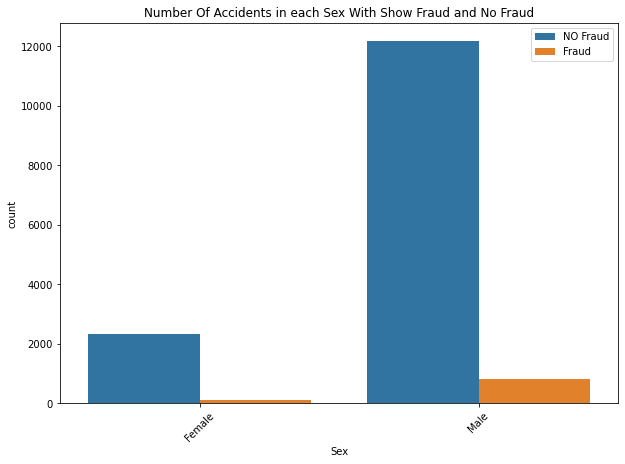

In [57]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['Sex'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Sex With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

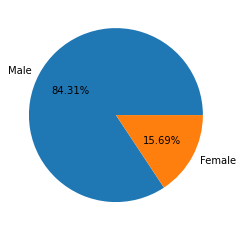

In [58]:
labels = ['Male', 'Female']
plt.pie(vic['Sex'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

### Conclusion for Sex Analysis
Most driver are men (approximately 84.31%) and the remaining 15.69% are women.

#### Marital Status Analysis

In [59]:
vic['MaritalStatus']

0         Single
1         Single
2        Married
3        Married
4         Single
          ...   
15415    Married
15416    Married
15417     Single
15418    Married
15419     Single
Name: MaritalStatus, Length: 15420, dtype: object

In [60]:
vic['MaritalStatus'].describe()

count       15420
unique          4
top       Married
freq        10625
Name: MaritalStatus, dtype: object

In [61]:
marital = pd.DataFrame(vic.groupby(['MaritalStatus']).size()).reset_index()
marital = marital.rename(columns={0: 'NumberOfAccidents'})
marital

,MaritalStatus,NumberOfAccidents
0,Divorced,76
1,Married,10625
2,Single,4684
3,Widow,35


In [62]:
sorted_marital = marital.sort_values(by=['NumberOfAccidents'], ascending=False)
sorted_marital

,MaritalStatus,NumberOfAccidents
1,Married,10625
2,Single,4684
0,Divorced,76
3,Widow,35


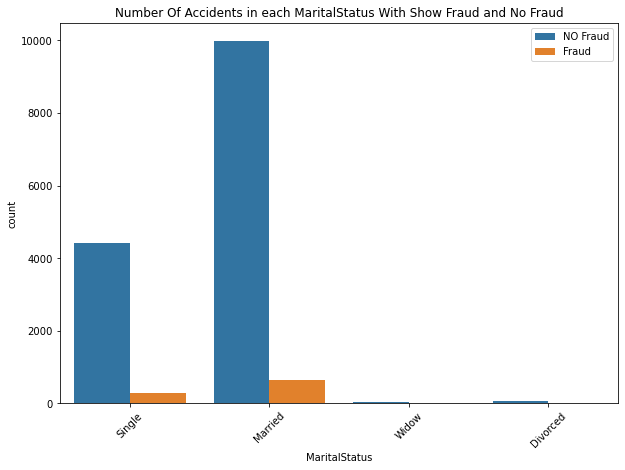

In [63]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['MaritalStatus'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each MaritalStatus With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

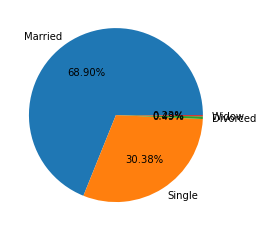

In [122]:
labels = ['Married', 'Single', 'Divorced', 'Widow']
plt.pie(vic['MaritalStatus'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

### Conclusion for Marital Status Analysis
Most of the claims are from people who are married (about 68.90 percent) and about 30.38 percent of the claims are from single people. The remaining percentage is from people who are either divorced or widowed.

#### Age Analysis

In [65]:
vic['Age']

0        21
1        34
2        47
3        65
4        27
         ..
15415    35
15416    30
15417    24
15418    34
15419    21
Name: Age, Length: 15420, dtype: int64

In [66]:
vic['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

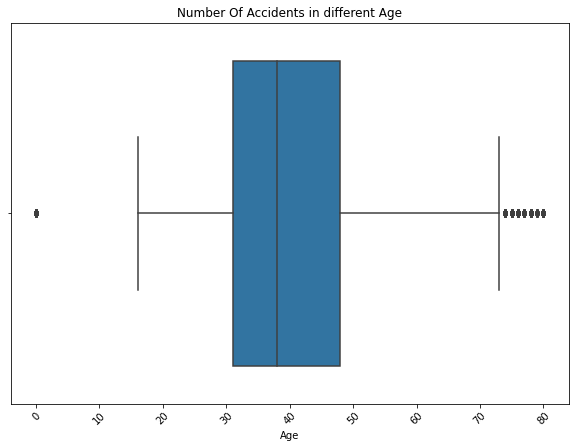

In [67]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=vic['Age'])
plt.title('Number Of Accidents in different Age')
plt.xticks(rotation=45)
plt.show()

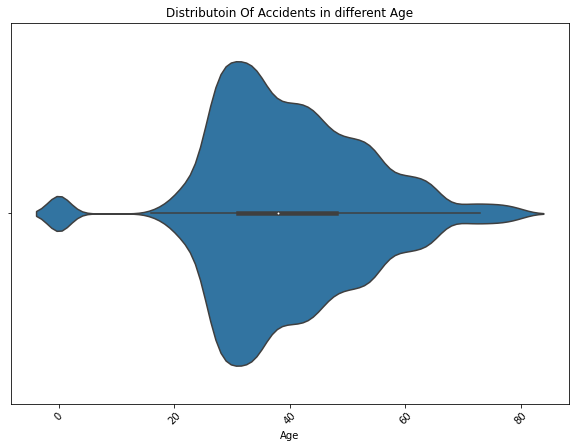

In [68]:
plt.figure(figsize=(10, 7))
sns.violinplot(x=vic['Age'])
plt.title('Distributoin Of Accidents in different Age')
plt.xticks(rotation=45)
plt.show()

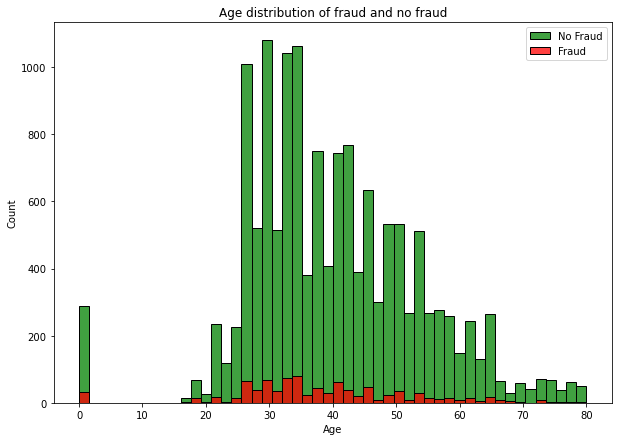

In [69]:
no_fraud = vic[vic['FraudFound_P'] == 0]
fraud = vic[vic['FraudFound_P'] == 1]

labels = ['No Fraud', 'Fraud']
plt.figure(figsize=(10,7))
sns.histplot(x=no_fraud['Age'], color='green', bins=50)
sns.histplot(x=fraud['Age'], color='red', bins=50)
plt.title('Age distribution of fraud and no fraud')
plt.legend(labels)
plt.show()

In [70]:
vic[vic['Age'] == 0].shape[0]

320

#### Age Of Policy Holder Analysis

In [71]:
vic['AgeOfPolicyHolder']

0        26 to 30
1        31 to 35
2        41 to 50
3        51 to 65
4        31 to 35
           ...   
15415    31 to 35
15416    31 to 35
15417    26 to 30
15418    31 to 35
15419    26 to 30
Name: AgeOfPolicyHolder, Length: 15420, dtype: object

In [72]:
vic['AgeOfPolicyHolder'].describe()

count        15420
unique           9
top       31 to 35
freq          5593
Name: AgeOfPolicyHolder, dtype: object

In [73]:
age = pd.DataFrame(vic.groupby(['AgeOfPolicyHolder']).size()).reset_index()
age = age.rename(columns={0: 'NumberOfAccidents'})
age

,AgeOfPolicyHolder,NumberOfAccidents
0,16 to 17,320
1,18 to 20,15
2,21 to 25,108
3,26 to 30,613
4,31 to 35,5593
5,36 to 40,4043
6,41 to 50,2828
7,51 to 65,1392
8,over 65,508


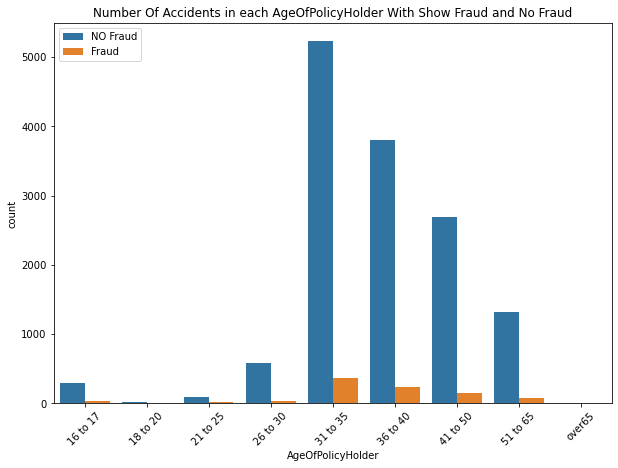

In [74]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['AgeOfPolicyHolder'], hue=vic['FraudFound_P'], order=['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over65'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each AgeOfPolicyHolder With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

### Conclusion for Age and Age Of Policy Holder Analysis
First, according to the descriptions of this feature(vic['Age'].describe()), we see that the average age of all people is almost equal to 39. Further, according to the box plot, we understand that the median age of people is almost equal to 38, and also according to the violin plot that displays the data distribution, we see that a large percentage of claimants are between 35 and 60 years old. The interesting thing to note is that the age of some people has been recorded as 0, which means that these samples are missing values, and these samples should either be deleted or corrected with average or median methods in the data preprocessing section.

The top 4 age range of policy holders who claim is as follows:
1. 31 to 35 (Highest)
2. 36 to 40
3. 41 to 50
4. 51 to 65

#### Fault Analysis

In [75]:
vic['Fault']

0        Policy Holder
1        Policy Holder
2        Policy Holder
3          Third Party
4          Third Party
             ...      
15415    Policy Holder
15416    Policy Holder
15417    Policy Holder
15418      Third Party
15419    Policy Holder
Name: Fault, Length: 15420, dtype: object

In [76]:
vic['Fault'].describe()

count             15420
unique                2
top       Policy Holder
freq              11230
Name: Fault, dtype: object

In [77]:
fault = pd.DataFrame(vic.groupby(['Fault']).size()).reset_index()
fault = fault.rename(columns={0: 'NumberOfAccidents'})
fault

,Fault,NumberOfAccidents
0,Policy Holder,11230
1,Third Party,4190


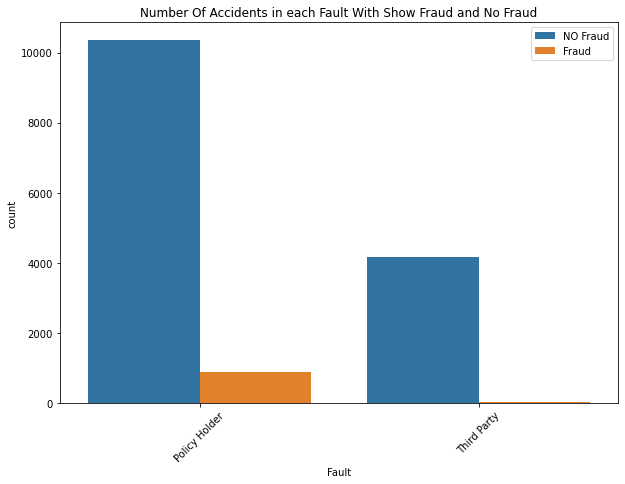

In [78]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['Fault'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Fault With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

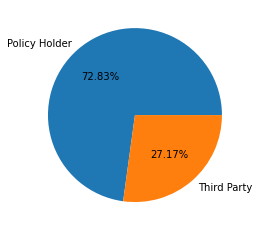

In [79]:
labels = ['Policy Holder', 'Third Party']
plt.pie(vic['Fault'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

### Conclusion for Fault Analysis
About 72.38% of the injured are insurance policy holders. The remaining 27.17% are third party people. But according to the histogram, we see that very few of the third-party samples were fraudulent

#### Vehicle Category Analysis

In [80]:
vic['VehicleCategory']

0        Sport
1        Sport
2        Sport
3        Sport
4        Sport
         ...  
15415    Sedan
15416    Sport
15417    Sedan
15418    Sedan
15419    Sedan
Name: VehicleCategory, Length: 15420, dtype: object

In [81]:
vic['VehicleCategory'].describe()

count     15420
unique        3
top       Sedan
freq       9671
Name: VehicleCategory, dtype: object

In [82]:
vehicle = pd.DataFrame(vic.groupby(['VehicleCategory']).size()).reset_index()
vehicle = vehicle.rename(columns={0: 'NumberOfAccidents'})
vehicle

,VehicleCategory,NumberOfAccidents
0,Sedan,9671
1,Sport,5358
2,Utility,391


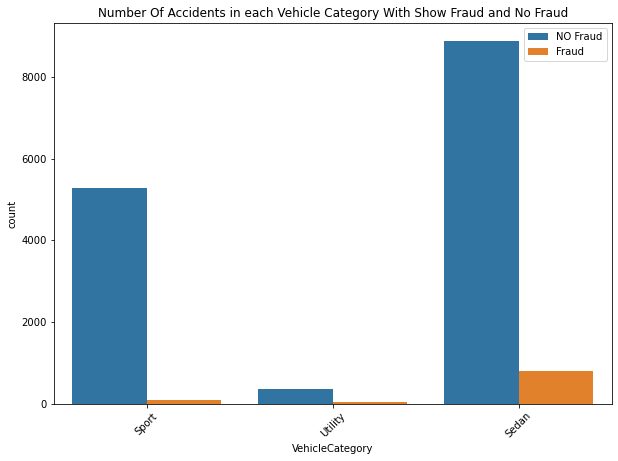

In [83]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['VehicleCategory'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Vehicle Category With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

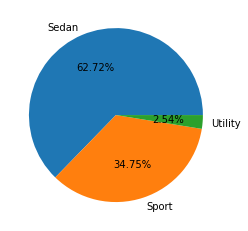

In [84]:
labels = ['Sedan', 'Sport', 'Utility']
plt.pie(vic['VehicleCategory'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

#### Policy Type Analysis

In [85]:
vic['PolicyType']

0         Sport - Liability
1         Sport - Collision
2         Sport - Collision
3         Sedan - Liability
4         Sport - Collision
                ...        
15415     Sedan - Collision
15416     Sedan - Liability
15417     Sedan - Collision
15418    Sedan - All Perils
15419     Sedan - Collision
Name: PolicyType, Length: 15420, dtype: object

In [86]:
vic['PolicyType'].describe()

count                 15420
unique                    9
top       Sedan - Collision
freq                   5584
Name: PolicyType, dtype: object

In [87]:
policy_type = pd.DataFrame(vic.groupby(['PolicyType']).size()).reset_index()
policy_type = policy_type.rename(columns={0: 'NumberOfAccidents'})
policy_type

,PolicyType,NumberOfAccidents
0,Sedan - All Perils,4087
1,Sedan - Collision,5584
2,Sedan - Liability,4987
3,Sport - All Perils,22
4,Sport - Collision,348
5,Sport - Liability,1
6,Utility - All Perils,340
7,Utility - Collision,30
8,Utility - Liability,21


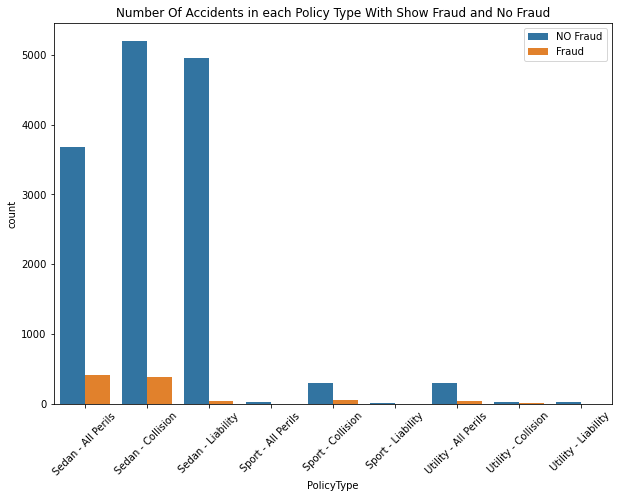

In [89]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['PolicyType'], hue=vic['FraudFound_P'], order=['Sedan - All Perils', 'Sedan - Collision', 'Sedan - Liability',
                                                                   'Sport - All Perils', 'Sport - Collision', 'Sport - Liability',
                                                                   'Utility - All Perils', 'Utility - Collision', 'Utility - Liability'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Policy Type With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

#### Vehicle Price Analysis

In [90]:
vic['VehiclePrice']

0        more than 69000
1        more than 69000
2        more than 69000
3         20000 to 29000
4        more than 69000
              ...       
15415     20000 to 29000
15416     30000 to 39000
15417     20000 to 29000
15418     20000 to 29000
15419     20000 to 29000
Name: VehiclePrice, Length: 15420, dtype: object

In [91]:
vic['VehiclePrice'].describe()

count              15420
unique                 6
top       20000 to 29000
freq                8079
Name: VehiclePrice, dtype: object

In [92]:
price = pd.DataFrame(vic.groupby(['VehiclePrice']).size()).reset_index()
price = price.rename(columns={0: 'NumberOfAccidents'})
price

,VehiclePrice,NumberOfAccidents
0,20000 to 29000,8079
1,30000 to 39000,3533
2,40000 to 59000,461
3,60000 to 69000,87
4,less than 20000,1096
5,more than 69000,2164


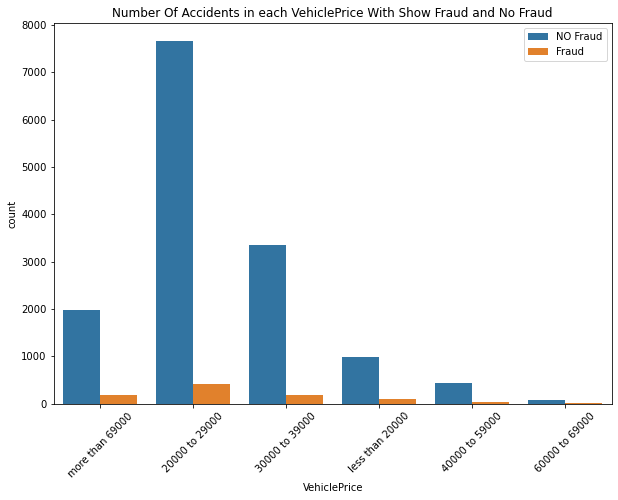

In [101]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['VehiclePrice'], hue=vic['FraudFound_P'], order=['less than 20000', '20000 to 29000', '30000 to 39000',
                                                                     '40000 to 59000', '60000 to 69000', 'more than 69000'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each VehiclePrice With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

#### Age of Vehicle Analysis

In [93]:
vic['AgeOfVehicle']

0            3 years
1            6 years
2            7 years
3        more than 7
4            5 years
            ...     
15415        6 years
15416        6 years
15417        5 years
15418        2 years
15419        5 years
Name: AgeOfVehicle, Length: 15420, dtype: object

In [94]:
vic['AgeOfVehicle'].describe()

count       15420
unique          8
top       7 years
freq         5807
Name: AgeOfVehicle, dtype: object

In [95]:
veh_age = pd.DataFrame(vic.groupby(['AgeOfVehicle']).size()).reset_index()
veh_age = veh_age.rename(columns={0: 'NumberOfAccidents'})
veh_age

,AgeOfVehicle,NumberOfAccidents
0,2 years,73
1,3 years,152
2,4 years,229
3,5 years,1357
4,6 years,3448
5,7 years,5807
6,more than 7,3981
7,new,373


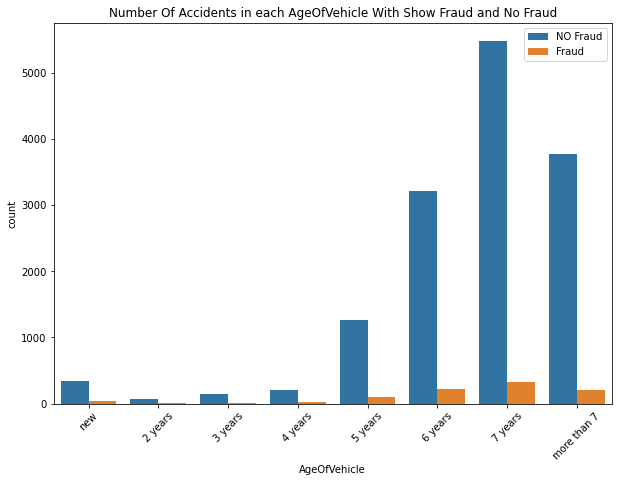

In [96]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['AgeOfVehicle'], hue=vic['FraudFound_P'], order=['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each AgeOfVehicle With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

### Conclusion for Vehicle Category , Policy Type and Vehicle Price Analysis
By evaluating the Vehicle Category, we see that most of the claims were for sedan cars, followed by sports cars and finally utility cars. In the following order:
1. Sedan (62.72 %)
2. Sport (34.75 %)
3. Utility (2.54 %)

In the next analysis, which is related to the Policy Type, we see that most of the claims are related to Sedan - Collision, Sedan - All Perils and Sedan - Liability.

In the next analysis, which is related to the price range of Vehicle, most of the claims are related to the following price ranges:
1. 20000 to 29000 (Highest)
2. 30000 to 39000 
3. more than 69000
4. less than 20000
5. 40000 to 59000
6. 60000 to 69000 (Lowest)

In the last analysis, which is related to the age of vehicle, top 4 of the claims are related to the following age of vehicle:
1. 7 years (Highest)
2. more than 7 years
3. 6 years
4. 5 years

#### Police Report Filed Analysis

In [97]:
vic['PoliceReportFiled']

0         No
1        Yes
2         No
3        Yes
4         No
        ... 
15415     No
15416     No
15417     No
15418     No
15419     No
Name: PoliceReportFiled, Length: 15420, dtype: object

In [98]:
vic['PoliceReportFiled'].describe()

count     15420
unique        2
top          No
freq      14992
Name: PoliceReportFiled, dtype: object

In [99]:
report = pd.DataFrame(vic.groupby(['PoliceReportFiled']).size()).reset_index()
report = report.rename(columns={0: 'NumberOfAccidents'})
report

,PoliceReportFiled,NumberOfAccidents
0,No,14992
1,Yes,428


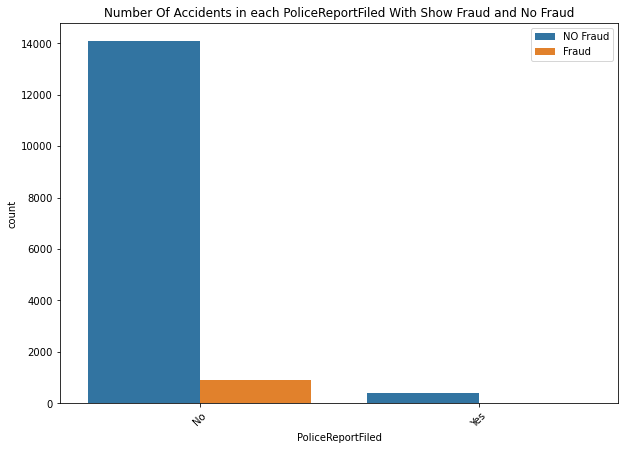

In [100]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['PoliceReportFiled'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each PoliceReportFiled With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

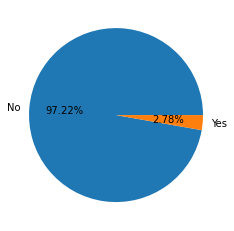

In [101]:
labels = ['No', 'Yes']
plt.pie(vic['PoliceReportFiled'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

#### Witness Present Analysis

In [102]:
vic['WitnessPresent']

0        No
1        No
2        No
3        No
4        No
         ..
15415    No
15416    No
15417    No
15418    No
15419    No
Name: WitnessPresent, Length: 15420, dtype: object

In [103]:
vic['WitnessPresent'].describe()

count     15420
unique        2
top          No
freq      15333
Name: WitnessPresent, dtype: object

In [104]:
witness = pd.DataFrame(vic.groupby(['WitnessPresent']).size()).reset_index()
witness = witness.rename(columns={0: 'NumberOfAccidents'})
witness

,WitnessPresent,NumberOfAccidents
0,No,15333
1,Yes,87


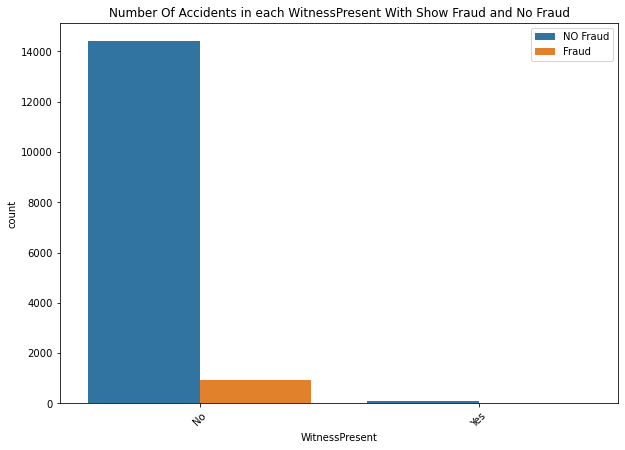

In [105]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['WitnessPresent'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each WitnessPresent With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

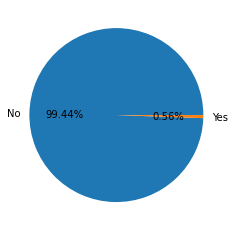

In [106]:
labels = ['No', 'Yes']
plt.pie(vic['WitnessPresent'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

#### Agent Type Analysis

In [107]:
vic['AgentType']

0        External
1        External
2        External
3        External
4        External
           ...   
15415    External
15416    External
15417    External
15418    External
15419    External
Name: AgentType, Length: 15420, dtype: object

In [108]:
vic['AgentType'].describe()

count        15420
unique           2
top       External
freq         15179
Name: AgentType, dtype: object

In [109]:
agent = pd.DataFrame(vic.groupby(['AgentType']).size()).reset_index()
agent = agent.rename(columns={0: 'NumberOfAccidents'})
agent

,AgentType,NumberOfAccidents
0,External,15179
1,Internal,241


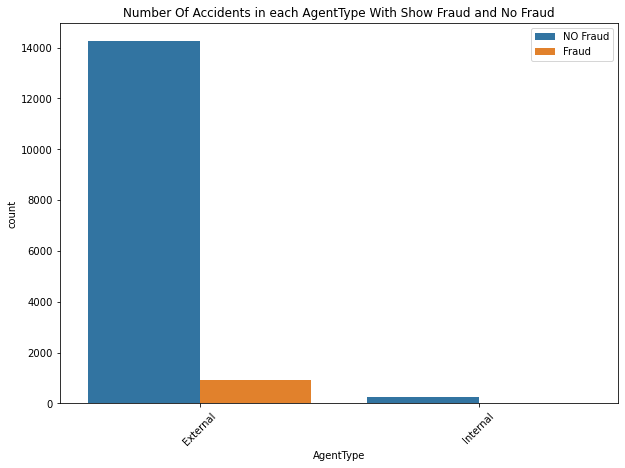

In [110]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['AgentType'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each AgentType With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

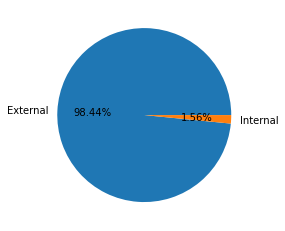

In [111]:
labels = ['External', 'Internal']
plt.pie(vic['AgentType'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()

### Conclusion for Police Report Filed , Witness Present  and Agent Type Analysis
In the first analysis, we see that in most of the claims (about 97.22 percent), the police report was not filed.<br>
In the second analysis, I see that most of the claims (about 99.44%) did not have witnesses present.<br>
In the last analysis, we see that most agent types (about 98.44%) are of external type.

#### Number Of Cars Analysis

In [112]:
vic['NumberOfCars']

0           3 to 4
1        1 vehicle
2        1 vehicle
3        1 vehicle
4        1 vehicle
           ...    
15415    1 vehicle
15416       3 to 4
15417    1 vehicle
15418    1 vehicle
15419    1 vehicle
Name: NumberOfCars, Length: 15420, dtype: object

In [113]:
vic['NumberOfCars'].describe()

count         15420
unique            5
top       1 vehicle
freq          14316
Name: NumberOfCars, dtype: object

In [114]:
num_cars = pd.DataFrame(vic.groupby(['NumberOfCars']).size()).reset_index()
num_cars = num_cars.rename(columns={0: 'NumberOfAccidents'})
num_cars

,NumberOfCars,NumberOfAccidents
0,1 vehicle,14316
1,2 vehicles,709
2,3 to 4,372
3,5 to 8,21
4,more than 8,2


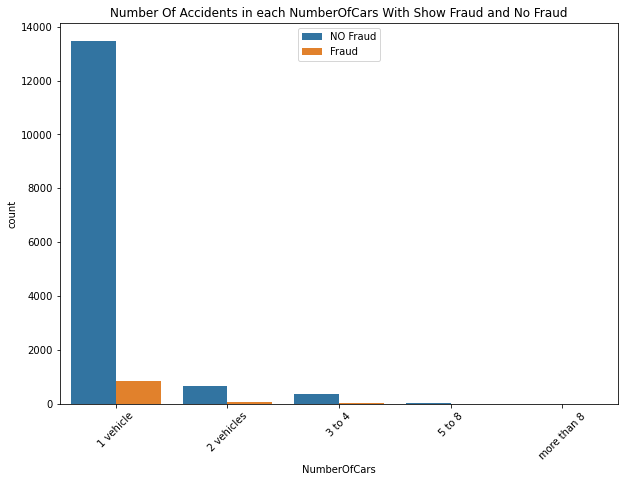

In [115]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['NumberOfCars'], hue=vic['FraudFound_P'], order=['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each NumberOfCars With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

### Conclusion for Number Of Cars Analysis
In most of the claims, the number of cars was one.

#### Years Analysis

In [116]:
vic['Year']

0        1994
1        1994
2        1994
3        1994
4        1994
         ... 
15415    1996
15416    1996
15417    1996
15418    1996
15419    1996
Name: Year, Length: 15420, dtype: int64

In [117]:
vic['Year'].describe()

count    15420.000000
mean      1994.866472
std          0.803313
min       1994.000000
25%       1994.000000
50%       1995.000000
75%       1996.000000
max       1996.000000
Name: Year, dtype: float64

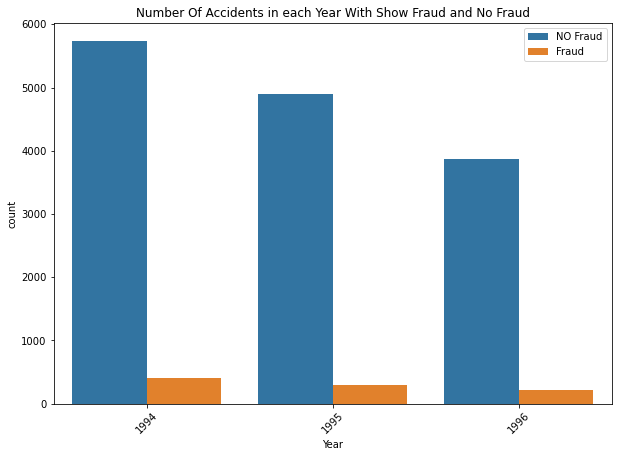

In [118]:
plt.figure(figsize=(10, 7))
labels = ['NO Fraud','Fraud']
sns.countplot(x=vic['Year'], hue=vic['FraudFound_P'])
plt.legend(labels, loc='best')
plt.title('Number Of Accidents in each Year With Show Fraud and No Fraud')
plt.xticks(rotation=45)
plt.show()

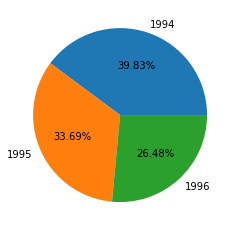

In [119]:
labels = ['1994', '1995', '1996']
plt.pie(vic['Year'].value_counts().values, labels=labels, autopct='%.2f%%')
plt.show()